In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data = pd.read_csv('C:/Users/My-Asus/Downloads/pencemaran/combined.csv')
data.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25
0,2020-08-01,DKI1 (Bunderan HI),65,18,7,84,13,84.0,O3,SEDANG,NaN
1,2020-08-02,DKI1 (Bunderan HI),75,17,11,77,15,77.0,O3,SEDANG,NaN
2,2020-08-03,DKI1 (Bunderan HI),71,18,9,65,11,71.0,PM10,SEDANG,NaN
3,2020-08-04,DKI1 (Bunderan HI),61,19,5,61,11,61.0,PM10,SEDANG,NaN
4,2020-08-05,DKI1 (Bunderan HI),67,20,7,70,12,70.0,O3,SEDANG,NaN


In [3]:
data.tail()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25
3650,2021-09-26,DKI5 (Kebon Jeruk) Jakarta Barat,48,---,4,30,9,67.0,PM25,SEDANG,67
3651,2021-09-27,DKI5 (Kebon Jeruk) Jakarta Barat,51,---,9,22,18,78.0,PM25,SEDANG,78
3652,2021-09-28,DKI5 (Kebon Jeruk) Jakarta Barat,42,---,5,26,14,64.0,PM25,SEDANG,64
3653,2021-09-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,---,11,34,19,87.0,PM25,SEDANG,87
3654,2021-09-30,DKI5 (Kebon Jeruk) Jakarta Barat,68,---,10,46,13,108.0,PM25,TIDAK SEHAT,108


In [4]:
print(data.shape)

(3655, 11)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   3655 non-null   object 
 1   stasiun   3655 non-null   object 
 2   pm10      3655 non-null   object 
 3   so2       3655 non-null   object 
 4   co        3655 non-null   object 
 5   o3        3655 non-null   object 
 6   no2       3655 non-null   object 
 7   max       3651 non-null   float64
 8   critical  3623 non-null   object 
 9   categori  3655 non-null   object 
 10  pm25      1763 non-null   object 
dtypes: float64(1), object(10)
memory usage: 314.2+ KB


1. tanggal : Tanggal pengukuran kualitas udara
2. stasiun : Lokasi pengukuran di stasiun
3. pm10 : Partikulat salah satu parameter yang diukur
4. pm25 : Partikulat salah satu parameter yang diukur
5. so2 : Sulfida (dalam bentuk SO2) salah satu parameter yang diukur
6. co : Carbon Monoksida salah satu parameter yand diukur
7. o3 : Ozon salah satu parameter yang diukur
8. no2 : NItrogen dioksida salah satu parameter yang diukur
9. max : Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama
10. critical : Parameter yang hasil pengukurannya paling tinggi
11. categori : Kategori hasil perhitungan indeks standar pencemaran udara

In [6]:
#data pm25 hanya sejumlah 1763 dari 3655 data, maka dilakukan penghapusan.
data.drop(('pm25'), axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   3655 non-null   object 
 1   stasiun   3655 non-null   object 
 2   pm10      3655 non-null   object 
 3   so2       3655 non-null   object 
 4   co        3655 non-null   object 
 5   o3        3655 non-null   object 
 6   no2       3655 non-null   object 
 7   max       3651 non-null   float64
 8   critical  3623 non-null   object 
 9   categori  3655 non-null   object 
dtypes: float64(1), object(9)
memory usage: 285.7+ KB


In [7]:
# Mengubah format tanggal
data['tanggal'] = pd.to_datetime(data['tanggal'])
data['tanggal'] = data['tanggal'].dt.strftime('%Y-%m-%d')

c:\Users\My-Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/11/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\My-Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/11/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\My-Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/11/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\My-Asus\AppData\Local\Programs\Python\Python310\lib\sit

In [8]:
data['tanggal'] = pd.to_datetime(data['tanggal'])

# Sort dataframe berdasarkan tanggal
data = data.sort_values('tanggal')

In [9]:
data.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
1205,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK
1236,2020-01-01,DKI2 (Kelapa Gading),31,7,8,41,5,41.0,O3,BAIK
1329,2020-01-01,DKI5 (Kebon Jeruk) Jakarta Barat,35,13,18,46,---,46.0,O3,BAIK
1298,2020-01-01,DKI4 (Lubang Buaya),33,36,---,36,6,36.0,SO2,BAIK
1267,2020-01-01,DKI3 (Jagakarsa),38,11,25,41,---,41.0,O3,BAIK


In [10]:
data.tail()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
857,2021-12-31,DKI3 (Jagakarsa),64,21,44,17,---,64.0,PM10,SEDANG
795,2021-12-31,DKI1 (Bunderan HI),62,52,23,20,14,85.0,PM25,SEDANG
826,2021-12-31,DKI2 (Kelapa Gading),61,33,23,37,44,85.0,PM25,SEDANG
919,2021-12-31,DKI5 (Kebon Jeruk) Jakarta Barat,60,28,19,30,53,87.0,PM25,SEDANG
888,2021-12-31,DKI4 (Lubang Buaya),58,36,21,---,22,90.0,PM25,SEDANG


data berawalan dari 2020-01-01 dan berakhir di 2021-12-31

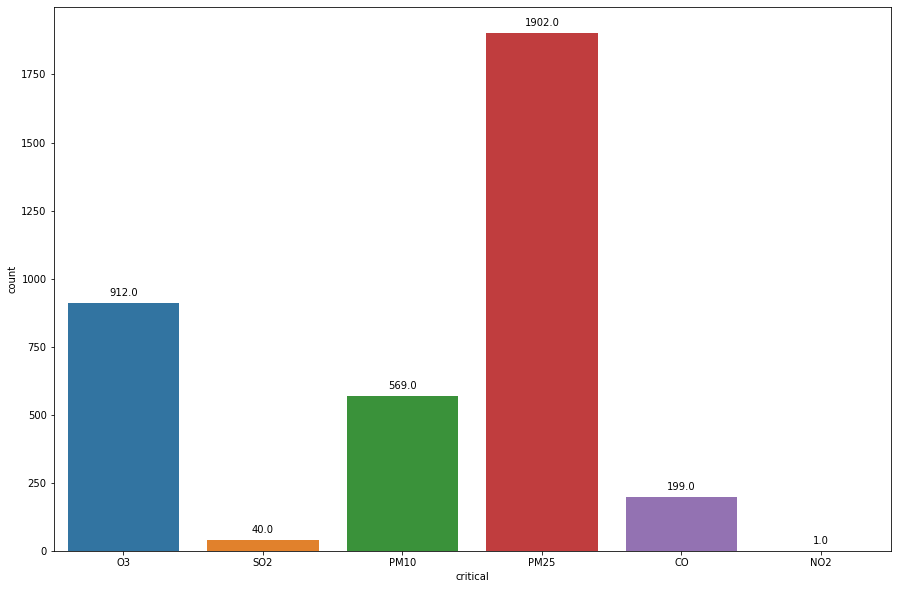

In [11]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x='critical', data=data)

# Tambahkan jumlah data di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

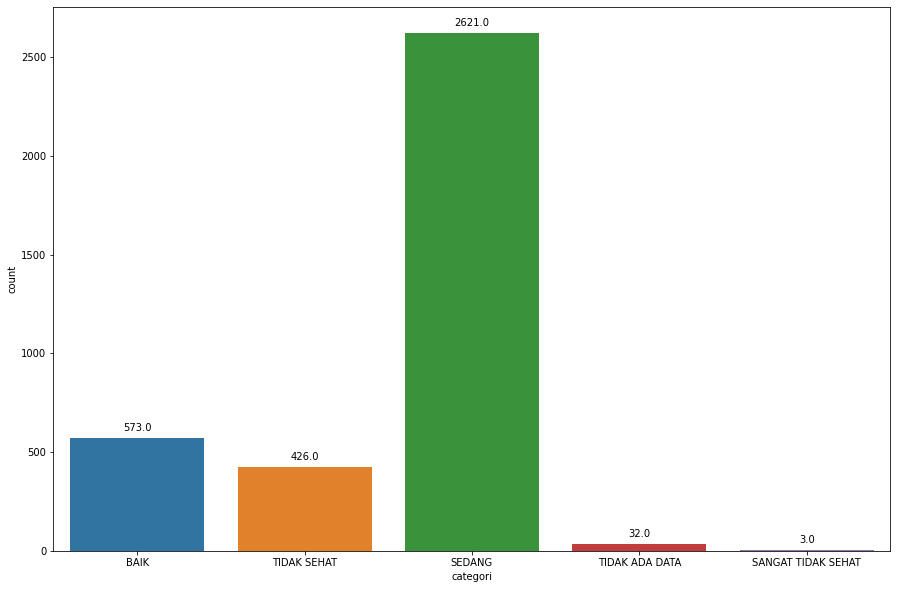

In [12]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x='categori', data=data)

# Tambahkan jumlah data di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


In [13]:
data['categori'] = data['categori'].replace("TIDAK ADA DATA", np.nan)

In [14]:
#melihat jumlah data berdasarkan stasiun
data['stasiun'].value_counts()

DKI1 (Bunderan HI)                  700
DKI5 (Kebon Jeruk) Jakarta Barat    700
DKI4 (Lubang Buaya)                 700
DKI3 (Jagakarsa)                    700
DKI2 (Kelapa Gading)                700
43                                   10
34                                    8
40                                    8
54                                    8
44                                    7
50                                    6
45                                    6
51                                    6
48                                    5
56                                    5
53                                    5
65                                    4
59                                    4
62                                    4
58                                    4
35                                    3
---                                   3
32                                    3
38                                    3
39                                    3


In [15]:
filtered_data = data[data['stasiun'].str.contains('---', na=False)]
print(filtered_data)

        tanggal stasiun pm10  so2   co   o3 no2  max critical categori
2197 2020-03-11     ---  ---  ---  ---  ---   0  NaN      NaN      NaN
2229 2020-03-12     ---  ---  ---  ---  ---   0  NaN      NaN      NaN
2248 2020-03-31     ---  ---  ---  ---  ---   0  NaN      NaN      NaN


terdapat 3 missing value (---), baris akan dihapus

In [16]:
data = data.loc[data['stasiun'] != '---']

In [17]:
filtered_data2 = data[data['stasiun'].str.contains('---', na=False)]
print(filtered_data2)

Empty DataFrame
Columns: [tanggal, stasiun, pm10, so2, co, o3, no2, max, critical, categori]
Index: []


In [18]:
#mengecek missing value lainnya
data.isnull().sum()

tanggal      0
stasiun      0
pm10         0
so2          0
co           0
o3           0
no2          0
max          1
critical    29
categori    29
dtype: int64

terdapat missing value pada kolim max, critical, dan categori

In [19]:
missing_data = data[data['categori'].isnull() | data['critical'].isnull()]
print(missing_data)

        tanggal                           stasiun pm10  so2   co   o3  no2  \
1013 2020-02-07               DKI4 (Lubang Buaya)  ---  ---  ---  ---  ---   
962  2020-02-14              DKI2 (Kelapa Gading)  ---  ---  ---  ---  ---   
2558 2020-05-31               DKI4 (Lubang Buaya)  ---  ---  ---  ---  ---   
1924 2020-06-06               DKI4 (Lubang Buaya)  ---  ---  ---  ---  ---   
1627 2020-07-20               DKI4 (Lubang Buaya)  ---  ---  ---  ---  ---   
93   2020-08-01               DKI4 (Lubang Buaya)  ---  ---  ---  ---  ---   
3468 2020-09-24               DKI4 (Lubang Buaya)  ---  ---  ---  ---  ---   
3413 2020-09-29              DKI2 (Kelapa Gading)  ---  ---  ---  ---  ---   
3474 2020-09-30               DKI4 (Lubang Buaya)  ---  ---  ---  ---  ---   
3149 2020-10-12               DKI4 (Lubang Buaya)  ---  ---  ---  ---    0   
3096 2020-10-21              DKI2 (Kelapa Gading)  ---  ---  ---  ---  ---   
684  2020-12-13                  DKI3 (Jagakarsa)  ---  ---  ---

baris dengan missing value pada kolom critical dan categori adalah baris yang sama sehingga dilakukan penghapusan baris.

In [20]:
# Menghapus baris yang mengandung nilai hilang di kolom 'kategori' dan 'critical'
data = data.dropna(subset=['categori', 'critical'])

In [21]:
# Imputasi max menggunakan interpolasi
data['max'] = data['max'].interpolate()

In [22]:
#mengecek missing value
data.isnull().sum()

tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

In [23]:
print(data.shape)

(3623, 10)


setelah dilakukan penanganan pada missing value data tersisa 3623 rows

melihat kualitas udara di 5 stasiun dengan jumlah data terbanyak yaitu di
DKI1 (Bunderan HI), DKI5 (Kebon Jeruk) Jakarta Barat, DKI4 (Lubang Buaya), DKI3 (Jagakarsa), DKI2 (Kelapa Gading)

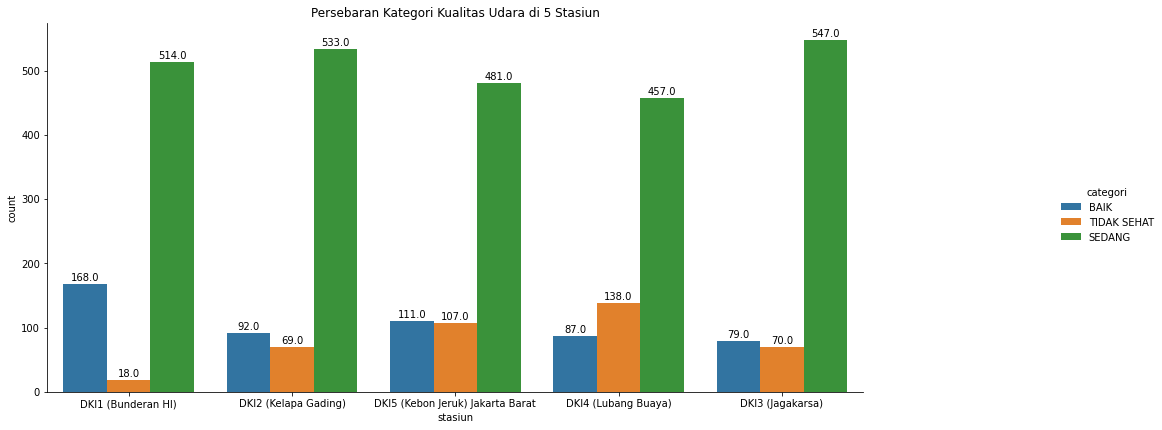

In [24]:
# Daftar stasiun yang ingin ditampilkan
selected_stations = ["DKI1 (Bunderan HI)", "DKI5 (Kebon Jeruk) Jakarta Barat", "DKI4 (Lubang Buaya)", "DKI3 (Jagakarsa)", "DKI2 (Kelapa Gading)"]

# Filter data untuk hanya menampilkan stasiun tertentu
filtered_data = data[data['stasiun'].isin(selected_stations)]

# Membuat catplot
catplot = sns.catplot(x='stasiun', hue='categori', kind='count', data=filtered_data)
catplot.fig.set_size_inches(18, 6)

# Menambahkan jumlah di atas setiap bar
for ax in catplot.axes.flat:
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 2, 
            round(bar.get_height(), 2), 
            ha='center', 
            va='bottom'
        )

plt.title('Persebaran Kategori Kualitas Udara di 5 Stasiun')
plt.show()


In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from pprint import pprint

# Dictionary untuk menyimpan pemetaan label
label_mappings = {}

for column in ['stasiun', 'critical', 'categori']:
    # Fit dan transform data
    data[column] = le.fit_transform(data[column])

    # Menyimpan pemetaan label
    label_mappings[column] = dict(zip(le.classes_, range(len(le.classes_))))

pprint(label_mappings)

{'categori': {'BAIK': 0,
              'SANGAT TIDAK SEHAT': 1,
              'SEDANG': 2,
              'TIDAK SEHAT': 3},
 'critical': {'CO': 0, 'NO2': 1, 'O3': 2, 'PM10': 3, 'PM25': 4, 'SO2': 5},
 'stasiun': {'101': 0,
             '22': 1,
             '24': 2,
             '25': 3,
             '27': 4,
             '30': 5,
             '32': 6,
             '33': 7,
             '34': 8,
             '35': 9,
             '36': 10,
             '37': 11,
             '38': 12,
             '39': 13,
             '40': 14,
             '41': 15,
             '42': 16,
             '43': 17,
             '44': 18,
             '45': 19,
             '47': 20,
             '48': 21,
             '49': 22,
             '50': 23,
             '51': 24,
             '52': 25,
             '53': 26,
             '54': 27,
             '55': 28,
             '56': 29,
             '57': 30,
             '58': 31,
             '59': 32,
             '60': 33,
             '61': 34,
     

In [27]:
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(label_mapping)

{'BAIK': 0, 'SANGAT TIDAK SEHAT': 1, 'SEDANG': 2, 'TIDAK SEHAT': 3}


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3623 entries, 1205 to 888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   3623 non-null   datetime64[ns]
 1   stasiun   3623 non-null   int32         
 2   pm10      3623 non-null   object        
 3   so2       3623 non-null   object        
 4   co        3623 non-null   object        
 5   o3        3623 non-null   object        
 6   no2       3623 non-null   object        
 7   max       3623 non-null   float64       
 8   critical  3623 non-null   int32         
 9   categori  3623 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(5)
memory usage: 268.9+ KB


In [29]:
columns_with_dash = [col for col in data.columns if (data[col] == '---').any()]
print(columns_with_dash)

['pm10', 'so2', 'co', 'o3', 'no2']


In [30]:
# Mengganti '---' dengan NaN
data = data.replace('---', np.nan)

# Mengisi NaN dengan mean
for kolom in ['pm10', 'so2', 'co', 'o3', 'no2']:
    data[kolom] = data[kolom].astype(float).fillna(data[kolom].astype(float).mean())

In [31]:
columns_with_dash2 = [col for col in data.columns if (data[col] == '---').any()]
print(columns_with_dash2)

[]


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3623 entries, 1205 to 888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   3623 non-null   datetime64[ns]
 1   stasiun   3623 non-null   int32         
 2   pm10      3623 non-null   float64       
 3   so2       3623 non-null   float64       
 4   co        3623 non-null   float64       
 5   o3        3623 non-null   float64       
 6   no2       3623 non-null   float64       
 7   max       3623 non-null   float64       
 8   critical  3623 non-null   int32         
 9   categori  3623 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(3)
memory usage: 268.9 KB


In [33]:
data.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
1205,2020-01-01,48,30.0,20.0,10.000000,32.0,9.000000,32.0,2,0
1236,2020-01-01,49,31.0,7.0,8.000000,41.0,5.000000,41.0,2,0
1329,2020-01-01,52,35.0,13.0,18.000000,46.0,19.537318,46.0,2,0
1298,2020-01-01,51,33.0,36.0,17.116188,36.0,6.000000,36.0,5,0
1267,2020-01-01,50,38.0,11.0,25.000000,41.0,19.537318,41.0,2,0


In [34]:
data.tail()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
857,2021-12-31,50,64.0,21.0,44.0,17.00000,19.537318,64.0,3,2
795,2021-12-31,48,62.0,52.0,23.0,20.00000,14.000000,85.0,4,2
826,2021-12-31,49,61.0,33.0,23.0,37.00000,44.000000,85.0,4,2
919,2021-12-31,52,60.0,28.0,19.0,30.00000,53.000000,87.0,4,2
888,2021-12-31,51,58.0,36.0,21.0,42.51727,22.000000,90.0,4,2


seluruh data sudah memiliki nilai bukan NaN

In [68]:
# Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
data[['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical']] = scaler.fit_transform(data[['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical']])
series = data['pm10'].values

In [71]:
# Menghitung threshold_mae
threshold_mae = (data['pm10'].max() - data['pm10'].min()) * 10/100
print(threshold_mae)

0.1


In [72]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [73]:
# Membagi data menjadi train dan test
split_time = int(len(series) * 0.8)
x_train = series[:split_time]
x_test = series[split_time:]

In [74]:
WINDOW_SIZE = 20
BATCH_SIZE = 32
SHUFFLE_BUFFER = 1000

# Membuat windowed dataset
train_set = windowed_dataset(x_train, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)

In [75]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

In [76]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.1):
      print("\nTraining Selesai")
      self.model.stop_training = True
callbacks = myCallback()

In [77]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100, callbacks=[callbacks])

Epoch 1/100
90/90 [==============================] - 20s 57ms/step - loss: 0.0097 - mae: 0.1069
Epoch 2/100
90/90 [==============================] - ETA: 0s - loss: 0.0057 - mae: 0.0801
Training Selesai
90/90 [==============================] - 5s 54ms/step - loss: 0.0057 - mae: 0.0801


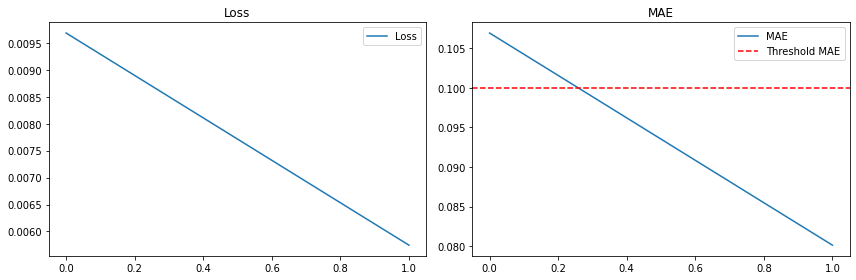

Threshold MAE: 0.1


In [79]:
# Plot loss dan akurasi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE')
plt.axhline(y=threshold_mae, color='r', linestyle='--', label='Threshold MAE')
plt.title('MAE')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Threshold MAE: {threshold_mae}")